## 12. 随机森林

### 12.1 集成模型和它的优势

**”集成模型(ensemble model)”** 对于几乎所有的分类问题(除了图像识别，因为对于图像识别问题，目前深度学习是标配)，集成模型成为了我们的首选。  
 
 比如构建一个评分卡系统，业界的标配是GBDT或者XGBoost等集成模型，主要因为它的效果确实好，而且稳定。还有一点是这些模型的可解释性也很好，不像深度学习模型就像个黑盒子。

可解释性对于工业界应用来说尤其重要。 比如一个模型出错了，我们希望第一时间能够找出问题的根源。但如果模型的可解释性比较差，则很难及时把问题定位出来。

**那为什么集成模型的可解释性好呢？**  
这个其实不难理解，因为随机森林或者提升树模型其实是基于决策树的，而且我们知道决策树模型的可解释性本来就很好。集成模型可以简单理解成决策树的集合！  
“三个臭皮匠顶个诸葛亮"。其实也从侧面反映了集成模型的思想，多个人一起决策要优于一个人单干。  

集成模型的两大类：
- bagging: 它的特点是各个弱学习器之间没有依赖关系，可以并行拟合。
 + 随机森林
- Boosting: 它的特点是各个弱学习器之间有依赖关系。
 + GBDA,XGBoost
 
#### Bagging
Bagging算法（Bootstrap aggregating，引导聚集算法），又称装袋算法，是机器学习领域的一种团体学习算法。
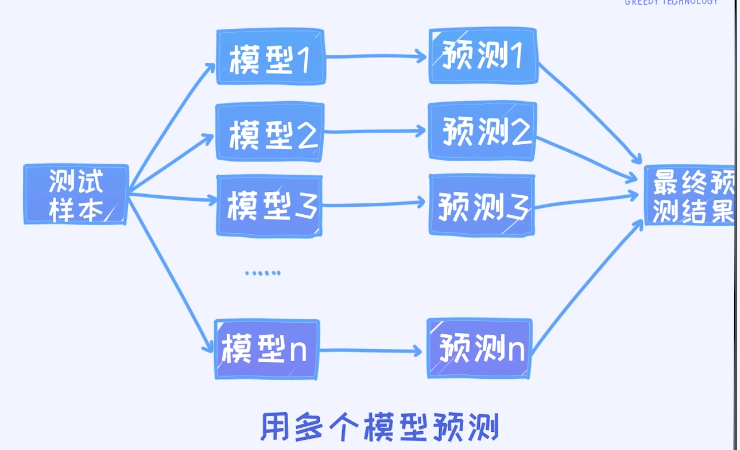

<img src="https://images2015.cnblogs.com/blog/1042406/201612/1042406-20161204200000787-1988863729.png" width="500"/>

Refeerence:  
[Bagging与随机森林算法原理小结](https://www.cnblogs.com/pinard/p/6156009.html)   
原理讲得较好 [[Machine Learning & Algorithm] 随机森林（Random Forest）](https://www.cnblogs.com/maybe2030/p/4585705.html)

### 12.2 从方差的角度分析其稳定性
方差小稳定性高。
### 12.3 随机、多样性以及模型的训练
随机森林的预测过程无非是多棵决策树共同作出决策。比如对于分类型问题，可以通过投票的方式； 对于回归问题，则可以采用平均法则。   
**核心问题**是：如何构造出多棵决策树。

构造随机森林的要点：
- 只有一份训练数据
- 确保多棵决策树优于一棵决策树  

稳定性的基础是多样性。

对样本和特征做随机化。

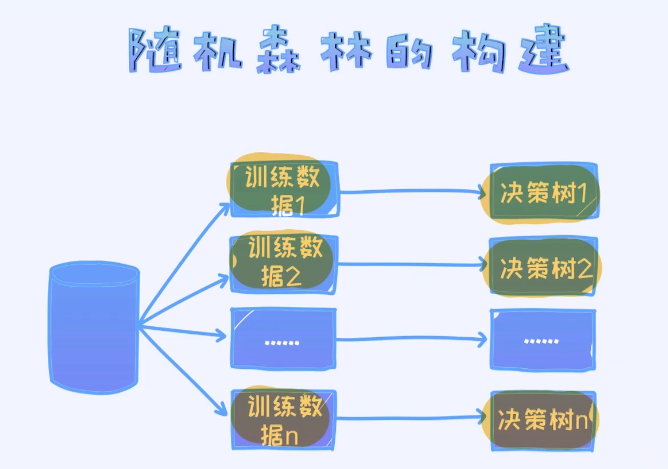



### 12.4 过拟合以及措施

一些超参数的调整：
- 参数**n_estimators**表示的是使用多棵树。数量越多，一般情况下越稳定，但时间成本也会变高。
- 参数**criterion**指的是用什么样的评估方式去选择当前根节点的特征。 选项有两个分别代表信息熵(entropy)和gini，在课程里我们只是学了前者。
- 参数**max_depth**值的是每一棵决策树的深度，它可以保证训练出来树的深度不超过某一个值。通过这种方式，我们可以从局部的角度避免过拟合现象。
- **min_samples_split**和**min_samples_leaf**控制叶节点样本的个数。
- 这里特别要说明的参数是max_features，这个值表示的是：每一次要做分裂(split)的时候随机选出来的特征个数。 

Tips: 随机森林的参数比较多，所以在实际的项目当中还是要认真去调参的。


Reference:  
[sklearn.ensemble.RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [3]:
#导入sklearn里的数据集
from sklearn.datasets import load_digits

#  导入随机森林分类器
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

# 导入实际数据
digits = load_digits()

X =digits.data
y = digits.target

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# 创建随机森林，调参
clf = RandomForestClassifier(n_estimators=400,criterion='entropy',max_depth=5,min_samples_split=3,max_features='sqrt',random_state=0)
clf.fit(X_train,y_train)

print("训练集上的准确率为：%.2f,测试集上的准确率为：%.2f" %(clf.score(X_train,y_train),clf.score(X_test,y_test)))


训练集上的准确率为：0.98,测试集上的准确率为：0.95


### 预测员工的离职率


比赛：[kaggle](https://www.kaggle.com/liujiaqi/hr-comma-sepcsv)

In [1]:
# 员工离职率预测

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
%matplotlib inline
from sklearn.model_selection import train_test_split

# 读取数据到pandas dataframe
df = pd.read_csv('HR_comma_sep.csv',index_col=None)

#检测是否有确实数据
print(df.isnull().any(),"\n\n")

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool 




In [2]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df = df.rename(columns={'satisfaction_level':'satisfaction',\
                        'last_evaluation':'evaluation',\
                        'number_project':'projectCount',\
                        'average_montly_hours':'averageMontlyHours',\
                        'time_spend_company':'yearsAtCompany',\
                        'Work_accident':'workAccident',\
                        'left':'turnover',\
                        'promotion_last_5years':'promotion',\
                        'sales':'department',})

In [4]:
# 将预测标签‘是否离职’放在第一列，这是label
front = df['turnover']
df.drop(labels=['turnover'],axis=1,inplace = True)
df.insert(0,'turnover',front)
df.head()

,turnover,satisfaction,evaluation,projectCount,averageMontlyHours,yearsAtCompany,workAccident,promotion,department,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,1,0.80,0.86,5,262,6,0,0,sales,medium
2,1,0.11,0.88,7,272,4,0,0,sales,medium
3,1,0.72,0.87,5,223,5,0,0,sales,low
4,1,0.37,0.52,2,159,3,0,0,sales,low


In [5]:
# 计算一下离职员工的百分比和没有离职的百分比
turnover_rate = df.turnover.value_counts() / len(df)
print('样本数据中，离职率为：%.2f\n\n' % turnover_rate[1])

# turnover_rate.head()
# 0    0.761917 # 在职
# 1    0.238083 # 离职

df.describe()

样本数据中，离职率为：0.24




,turnover,satisfaction,evaluation,projectCount,averageMontlyHours,yearsAtCompany,workAccident,promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.238083,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268
std,0.425924,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281
min,0.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,0.000000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000
50%,0.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,0.000000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


In [8]:
df.department.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [9]:
df.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [19]:
# 将string类型转换为整数型，不然后面处理不了
# df['department'] = df['department'].astype('category').cat.codes
# df['salary'] = df['salary'].astype('category').cat.codes

df['department'] = pd.get_dummies(df['department'])
df['salary'] = pd.get_dummies(df['salary'])


# 设置特征值和标签。 X 存放特征，y 存放标签
target_name = 'turnover'
X = df.drop('turnover',axis=1)
y = df[target_name]

# split dataset
# 注意参数stratify=y 意味着在产生训练和测试数据集中，离职的员工的百分比等于原来总的数据中的离职员工的百分比
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=123,stratify=y)

# 准备工作就绪，接下来训练模型
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# 训练决策树
dtree = tree.DecisionTreeClassifier(criterion='entropy',\
                                   # max_depth=3 # 定义输的深度，可以用来防止过拟合
                                   min_weight_fraction_leaf=0.001 # 定义叶子节点最少需要包含多少个样本
                                    #（使用百分比表达）防止过拟合
                                   )
dtree = dtree.fit(X_train,y_train)
print("决策树")
print(classification_report(y_test,dtree.predict(X_test)))

# 随机森林
rf = RandomForestClassifier(criterion='entropy',\
                           n_estimators=1000,\
                           max_depth=None,  #定义树的深度,可以用来防止过拟合
                           min_samples_split=10,#定义至少多少个样本的情况下才继续分叉
                            #min_weight_fraction_leaf=0.02#定义叶子节点最少需要包含多少个样本(百分比)，防止过拟合
                           )
rf.fit(X_train,y_train)
print("随机森林")
print(classification_report(y_test,rf.predict(X_test)))

决策树
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2286
           1       0.97      0.92      0.95       714

    accuracy                           0.98      3000
   macro avg       0.97      0.96      0.97      3000
weighted avg       0.98      0.98      0.98      3000

随机森林
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2286
           1       0.99      0.93      0.96       714

    accuracy                           0.98      3000
   macro avg       0.99      0.97      0.98      3000
weighted avg       0.98      0.98      0.98      3000



使用Category数据的一个好处就是：可以很好的节省在时间和空间的消耗。

Reference:  
astype('category').cat.codes：https://zhuanlan.zhihu.com/p/44256257